In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/var/folders/8w/r2ql930j0q54r_6xjp8xdvfw0000gn/T/ipykernel_72931/2591034107.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.drop('loan_id',axis=1,inplace=True)

In [6]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


Categorical Variables



,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected


In [7]:
def cleaner(dataframe):
    for i in dataframe.columns: 
        if ((dataframe[i].isnull().sum() / len(dataframe)) * 100) > 30: 
            dataframe.drop(i, axis = 1, inplace = True)
        elif dataframe[i].dtypes == 'O':
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True) 
        else:
            dataframe[i].fillna(dataframe[i].median(), inplace = True) 
    return dataframe

cleaner(data)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
data.isnull().sum().sort_values(ascending= False).head(2)

no_of_dependents    0
education           0
dtype: int64

In [9]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


[Text(0, 0, '5091604.5')]

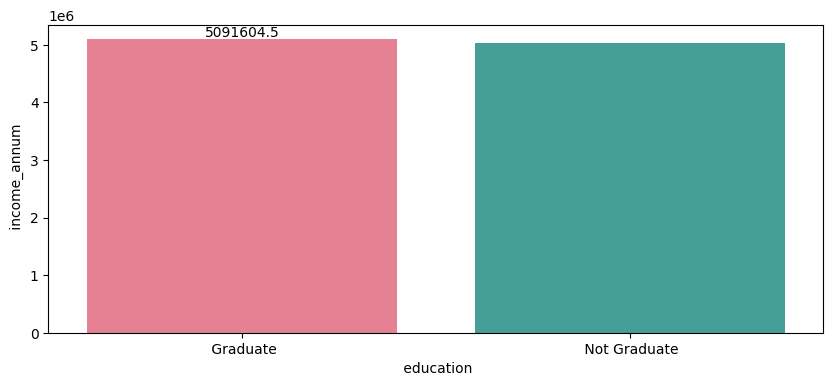

In [10]:
# Show the distribution of income_annum according to education 

plt.figure(figsize = (10, 4))
fig = sns.barplot(x = data[' education'], y = data[' income_annum'], ci = 0, palette = 'husl')
fig.bar_label(fig.containers[0], fmt = '%.1f')

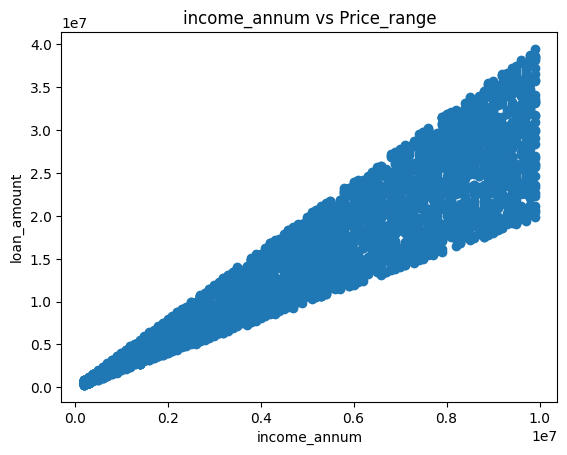

In [11]:
plt.scatter(x=data[' income_annum'], y=data[' loan_amount'])

plt.title('income_annum vs Price_range')

plt.xlabel('income_annum')

plt.ylabel('loan_amount')
plt.show()

<Axes: >

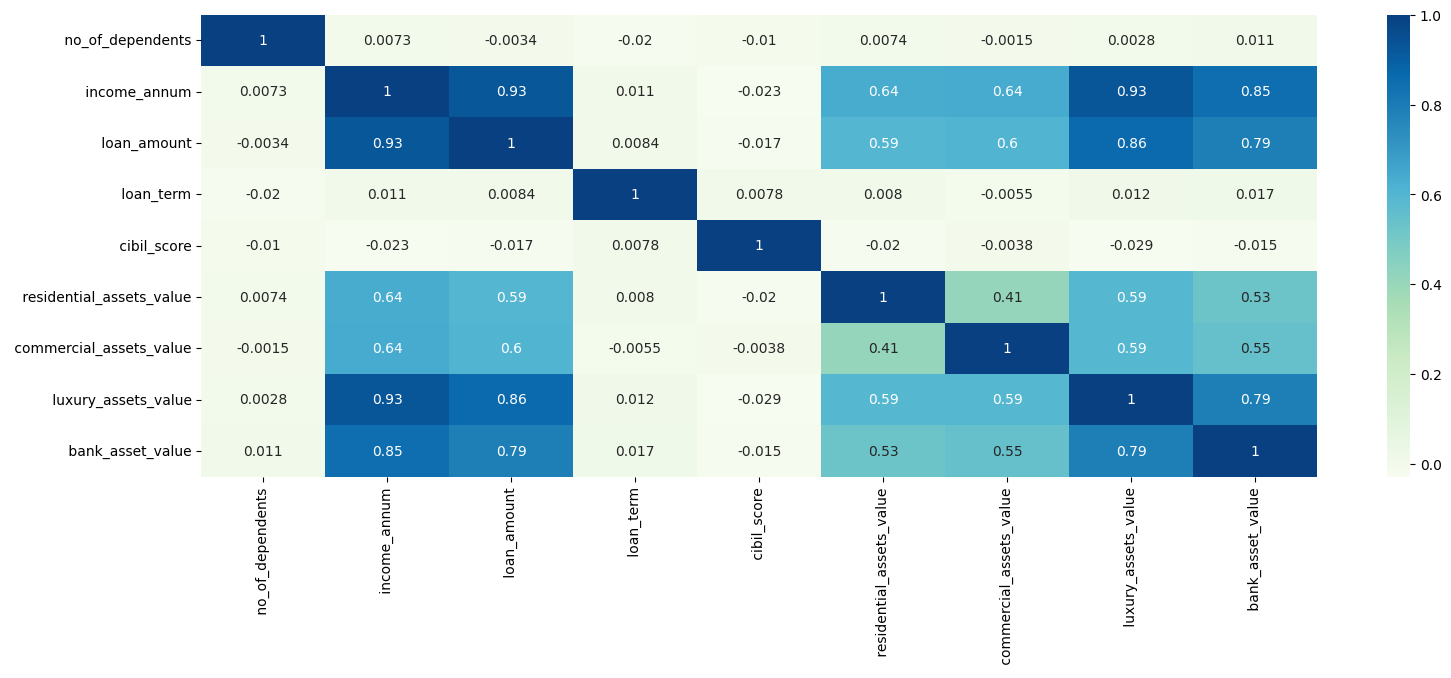

In [12]:
plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap = 'GnBu')

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
normalizing = MinMaxScaler()

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i] = lb.fit_transform(data[i])

data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

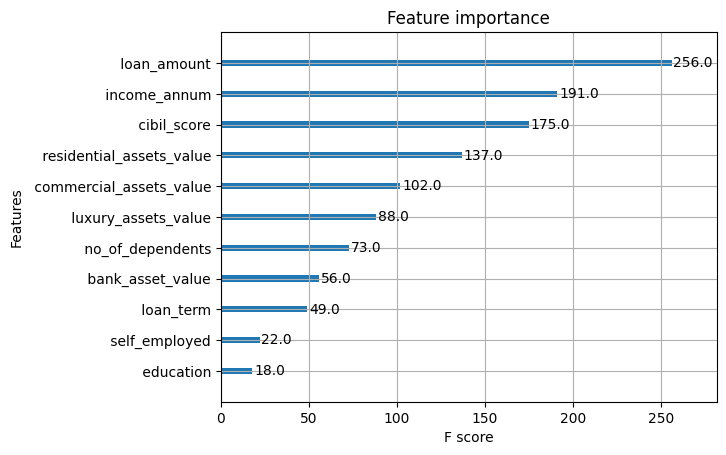

In [14]:
# - Using XGBOOST to find feature importance
x = data.drop(' loan_status', axis = 1)
y = data[' loan_status']

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [15]:
sel_cols = [' loan_amount', ' income_annum', ' cibil_score', ' residential_assets_value',' commercial_assets_value', ' luxury_assets_value', ' no_of_dependents', ' loan_status']
sel_data = data[sel_cols]
sel_data.head()

,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents,loan_status
0,29900000,9600000,778,2400000,17600000,22700000,2,0
1,12200000,4100000,417,2700000,2200000,8800000,0,1
2,29700000,9100000,506,7100000,4500000,33300000,3,1
3,30700000,8200000,467,18200000,3300000,23300000,3,1
4,24200000,9800000,382,12400000,8200000,29400000,5,1


In [16]:
import warnings
warnings.filterwarnings('ignore')
sel_data.dropna(inplace = True)
sel_data.shape

(4269, 8)

<Axes: xlabel=' loan_status', ylabel='count'>

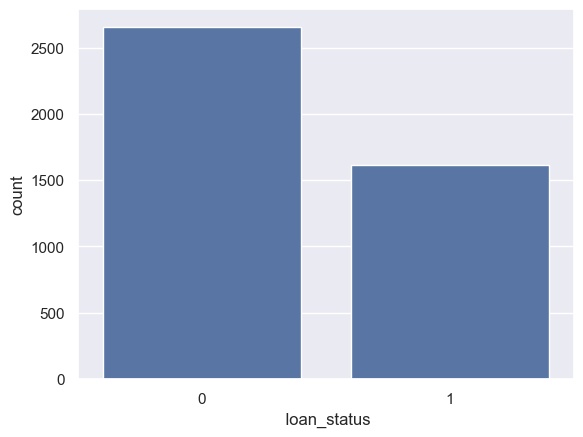

In [17]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data [' loan_status'])

<Axes: xlabel=' loan_status', ylabel='count'>

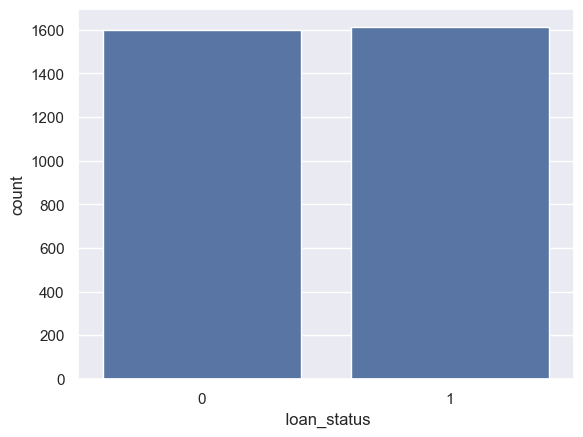

In [18]:
loan0 = sel_data.loc[sel_data[' loan_status'] == 0]
loan1 = sel_data.loc[sel_data[' loan_status'] == 1]

new_loan0= loan0.sample(1600)
new_data = pd.concat([new_loan0, loan1 ])

sns.countplot(x = new_data[' loan_status'])

In [19]:
# Split Into Train and Test
x = new_data.drop(' loan_status', axis = 1)
y = new_data[' loan_status']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [20]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.976672,0.999611
1,"XGBClassifier(base_score=None, booster=None, c...",0.967341,1.000000
2,DecisionTreeClassifier(),0.940902,1.000000
4,LogisticRegression(),0.662519,0.673930
3,SVC(kernel='poly'),0.505443,0.522568


In [21]:
# modelling with Logistic Regression
# split into train and test

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1280
           1       1.00      1.00      1.00      1290

    accuracy                           1.00      2570
   macro avg       1.00      1.00      1.00      2570
weighted avg       1.00      1.00      1.00      2570



In [22]:
print(classification_report(rf_model.fit(xtrain, ytrain) 
.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       309
           1       0.99      0.96      0.98       334

    accuracy                           0.98       643
   macro avg       0.98      0.98      0.98       643
weighted avg       0.98      0.98      0.98       643



In [23]:
# serialise transformers and model
import joblib


joblib.dump(rf_model,'loan_predictor_models.pkl') # to save your model to a file

['loan_predictor_models.pkl']

In [24]:
import joblib
imported_model = joblib.load('loan_predictor_models.pkl')
imported_model

RandomForestClassifier()

In [25]:
loan_status = data.sample(5).drop(' loan_status', axis = 1)
loan_status

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4172,4,1,0,4300000,13900000,2,894,10100000,100000,8600000,3300000
3220,3,0,1,8900000,22500000,12,887,23300000,10800000,33500000,9500000
2926,3,0,1,4000000,14700000,8,376,3000000,6200000,8900000,4200000
3778,0,1,1,2600000,6000000,8,382,1700000,2200000,8200000,1600000
3403,5,0,1,4800000,16300000,4,523,8800000,2300000,10000000,2800000


In [26]:
loan_status = loan_status[sel_cols[:-1]]
loan_status.dropna(inplace = True)
loan_status

,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents
4172,13900000,4300000,894,10100000,100000,8600000,4
3220,22500000,8900000,887,23300000,10800000,33500000,3
2926,14700000,4000000,376,3000000,6200000,8900000,3
3778,6000000,2600000,382,1700000,2200000,8200000,0
3403,16300000,4800000,523,8800000,2300000,10000000,5


In [27]:
imported_model.predict([[700000,	200000,	501,	500000,	200000,	700000,	0]])

array([1])

In [28]:
imported_model.predict(loan_status)

array([0, 0, 1, 1, 0])

In [29]:
 #batch predict and save the predicted patients into a new column called predicted patients
loan_status['predicted_loan'] = imported_model.predict(loan_status)
loan_status

,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents,predicted_loan
4172,13900000,4300000,894,10100000,100000,8600000,4,0
3220,22500000,8900000,887,23300000,10800000,33500000,3,0
2926,14700000,4000000,376,3000000,6200000,8900000,3,1
3778,6000000,2600000,382,1700000,2200000,8200000,0,1
3403,16300000,4800000,523,8800000,2300000,10000000,5,0
